# Homework 2

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


# 1. Fridge Light Failure

Imagine that you work for a company that sells fridges, with a lifetime warranty for the fridge lights. Your boss is interested in understanding the distribution of the number of lights that will fail in a given month, based on data collected over the last several years. The data were collected by hand and manually entered, so data entry errors are possible. There are also some months with missing data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import zscore
from scipy.special import factorial
import scipy.optimize as so

In [ ]:
# Uncomment the line below if you are using Google colab
!gdown https://drive.google.com/uc?id=1wzY4XdkcwdNdVGL42PEN0ORtzWcdj2VF

Downloading...
From: https://drive.google.com/uc?id=1wzY4XdkcwdNdVGL42PEN0ORtzWcdj2VF
To: /content/Fridge Light Data.csv
100% 746/746 [00:00<00:00, 2.32MB/s]


1. Read the CSV file using Pandas and store it. All you've been given are a meaningless ID and the counts of the number of fridge lights that failed in each month.

In [ ]:
data = pd.read_csv('Fridge Light Data.csv')
data.head()

,ID,x
0,1,24.0
1,2,33.0
2,3,31.0
3,4,NaN
4,5,31.0


2. Count the number of null values in the dataset, then remove them.

In [ ]:
data.isnull().any()

,0
ID,False
x,True


In [ ]:
null_columns = data.columns[data.isnull().any()]
data.loc[:, null_columns].isnull().sum()

,0
x,4


Number of null values: 4

In [ ]:
data.isnull().any()

,0
ID,False
x,True


In [ ]:
data.loc[data.isnull().any(axis = 1), :]

,ID,x
3,4,NaN
14,15,NaN
40,41,NaN
64,65,NaN


In [ ]:
len(data)

107

In [ ]:
data.drop(index=[3,14,40,64], axis=0, inplace = True)
data.isnull().any()

,0
ID,False
x,False


In [ ]:
len(data)

103

3. Plot the distribution of the data. Add a title and axes labels to your plot.

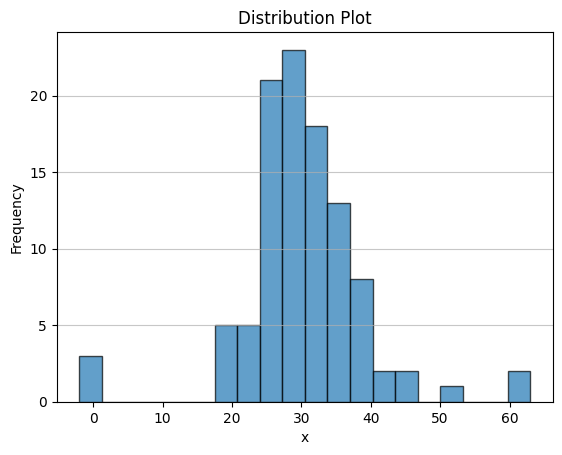

In [ ]:
plt.hist(data['x'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution Plot')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

4. Count the number of observations that you know with **certainty** are data entry errors, then remove them. Explain why you know they are errors.

In [ ]:
data.describe()

,ID,x
count,103.000000,103.000000
mean,54.883495,29.873786
std,30.946919,9.115468
min,1.000000,-2.000000
25%,28.500000,26.000000
50%,55.000000,29.000000
75%,81.500000,34.000000
max,107.000000,63.000000


In [ ]:
data['x'].sort_values(ascending=False).head()

,x
18,63.0
27,61.0
60,52.0
29,44.0
66,44.0


In [ ]:
data['x'].sort_values(ascending=True).head()

,x
77,-2.0
22,-2.0
91,-1.0
80,19.0
20,19.0


Number of certain data entry errors: 3, since the number of fridge lights that failed cannot be negative.

In [ ]:
data.drop(index=[22,77,91], axis=0, inplace = True)
data['x'].sort_values(ascending=True).head()

,x
80,19.0
20,19.0
69,20.0
46,20.0
42,20.0


In [ ]:
len(data)

100

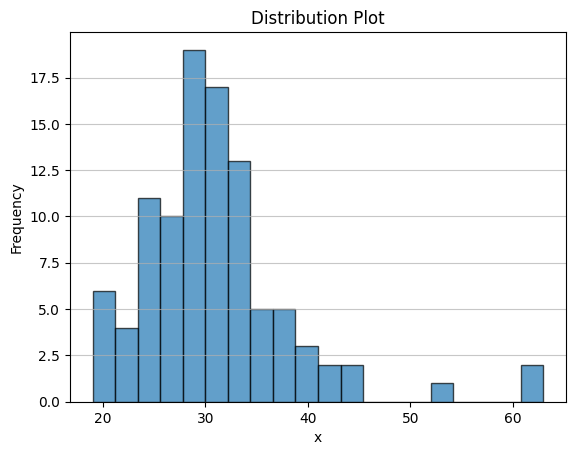

In [ ]:
plt.hist(data['x'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution Plot')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

5. Compute the negative log-likelihood based on the assumption that the data comes from a Poisson($\lambda$) distribution. The negative log-likelihood for a Poisson($\lambda$) distribution is as follows:

$$
nll(\lambda) = n \lambda - \left(\sum_{i=1}^{n}x_i\right) log(\lambda) + \sum_{i=1}^{n}log(x_i!)
$$

In [ ]:
from scipy.special import gammaln

def poissonNegLogLikelihood(lmbda, data):
  n = len(data)
  sum_x = np.sum(data)
  second_term = sum_x * np.log(lmbda)  # \sum log(lambda)
  third_term = np.sum(gammaln(data+1))  # \sum log(x_i!)
  nll = n * lmbda - second_term + third_term
  return nll

# Test your function on a dummy dataset with lambda = 25
dummy_data = pd.DataFrame({'x': [20, 22, 18, 6, 8]})
poissonNegLogLikelihood(25, dummy_data.x)

31.189286095130285

6. Consider integer values of $\lambda$ ranging from 10 to 50. Compute the negative log-likelihood for each of these values and plot it. Include a title and axes labels on your plot. Based on the plot, what value of $\lambda$ is most likely to have generated the data? You may give a small range.

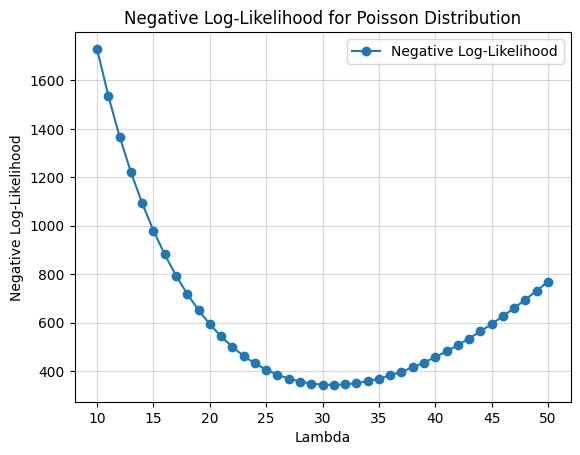

Lambda with minimum NLL: 31


In [ ]:
lambda_values = np.arange(10, 51)
nll_values = [poissonNegLogLikelihood(lmbda, data['x']) for lmbda in lambda_values]

# Plot the NLL values
plt.plot(lambda_values, nll_values, marker='o', linestyle='-', label='Negative Log-Likelihood')
plt.title('Negative Log-Likelihood for Poisson Distribution')
plt.xlabel('Lambda')
plt.ylabel('Negative Log-Likelihood')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

# Identify the lambda value with the minimum NLL
min_nll_lambda = lambda_values[np.argmin(nll_values)]
print(f"Lambda with minimum NLL: {min_nll_lambda}")

Value of $\lambda$ most likely to have generated the data: 31

7. Compute the negative log-likelihood based on the assumption that the data comes from a Normal($\mu$, $\sigma$) distribution. The negative log-likelihood for a Normal($\mu$, $\sigma$) distribution is as follows:

$$
nll(\mu, \sigma) = \frac{n}{2}\log(2π) + \frac{n}{2}\log(\sigma^2) + \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2
$$

In [ ]:
def normalNegLogLikelihood(params, data):
  mu, sigma = params
  n = len(data)
  first_term = (n/2) * np.log(2 * np.pi)
  second_term = (n/2) * np.log(sigma**2)
  third_term = np.sum((data - mu)**2) / (2 * sigma**2)
  nll = first_term + second_term + third_term
  return nll

# Test your function on a dummy dataset with mu = 25, sigma = 3
dummy_data = pd.DataFrame({'x': [20, 22, 18, 6, 8]})
normalNegLogLikelihood([25, 3], dummy_data.x)

50.809976331586135

8. Determine the exact value of $\lambda$ that minimizes the negative log-likelihood for the Poisson distribution. Use so.minimize with method="Powell" and without a Jacobian.

In [ ]:
from scipy.optimize import minimize

def objective_lambda(lmbda,data):
    # Prevent invalid lambda values (e.g., <= 0)
    if lmbda <= 0:
        return np.inf
    return poissonNegLogLikelihood(lmbda, data)

initial_guess_lambda = np.mean(data['x'])
result_lambda = minimize(fun=objective_lambda, x0=initial_guess_lambda, args=(data['x'],), method="Powell")
optimal_lambda = result_lambda.x[0]
print(f"Optimized lambda: {optimal_lambda:.2f}")
print(f"Sample Mean (MLE for lambda): {initial_guess_lambda:.2f}")

Optimized lambda: 30.82
Sample Mean (MLE for lambda): 30.82


Value of $\lambda$ that minimizes the negative log-likelihood: 30.82

9. Determine the set of values of $\mu$ and $\sigma$ that minimizes the negative log-likelihood for the Normal distribution.

In [ ]:
def objective_normal(params, data):
  return normalNegLogLikelihood(params, data)

initial_guess_normal = [np.mean(data['x']), np.std(data['x'])]

# Use scipy.optimize.minimize to find optimal mu and sigma
result_normal = minimize(fun=objective_normal, x0=initial_guess_normal, args=(data['x']), method="Powell")

# Extract the optimal mu and sigma values
optimal_mu, optimal_sigma = result_normal.x
print(f"Optimized mu: {optimal_mu:.2f}")
print(f"Optimized sigma: {optimal_sigma:.2f}")
print(f"Sample Mean (MLE for mu): {initial_guess_normal[0]:.2f}")
print(f"Sample SD (MLE for sigma): {initial_guess_normal[1]:.2f}")

Optimized mu: 30.82
Optimized sigma: 7.35
Sample Mean (MLE for mu): 30.82
Sample SD (MLE for sigma): 7.35


Values for $\mu$ and $\sigma$ that minimize the negative log-likelihood: 30.82, 7.35


10. There are three data entry errors that could potentially be valid entries. Which three are most likely to be data entry errors? Identify them by their value (i.e., not their index in the data).

In [ ]:
data['x'].sort_values(ascending=False).head(10)

,x
18,63.0
27,61.0
60,52.0
66,44.0
29,44.0
104,43.0
49,41.0
32,40.0
55,39.0
33,39.0


In [ ]:
zscore(data['x']).sort_values(ascending=False).head(10)

,x
18,4.378835
27,4.106689
60,2.882030
66,1.793445
29,1.793445
104,1.657371
49,1.385225
32,1.249152
55,1.113079
33,1.113079


Three most likely data entry errors: $63.0$, $61.0$, and $52.0$, since they have significantly higher z-scores than other records.

11. Remove the three observations that you think are most likely to be data entry errors. Determine the parameters that minimize the negative log-likelihoods for the Poisson($\lambda$) and Normal($\mu$, $\sigma$) distributions. Do your results change in a meaningful way?

In [ ]:
data.drop(index=[18,27,60], axis=0, inplace = True)
data['x'].sort_values(ascending=False).head()

,x
29,44.0
66,44.0
104,43.0
49,41.0
32,40.0


In [ ]:
len(data)

97

In [ ]:
initial_guess_lambda_new = np.mean(data['x'])
result_lambda_new = minimize(fun=objective_lambda, x0=initial_guess_lambda_new, args=(data['x'],), method="Powell")
optimal_lambda_new = result_lambda_new.x[0]
print(f"Optimized lambda: {optimal_lambda_new:.2f}")
print(f"Sample Mean (MLE for lambda): {initial_guess_lambda_new:.2f}")

Optimized lambda: 29.96
Sample Mean (MLE for lambda): 29.96


In [ ]:
initial_guess_normal_new = [np.mean(data['x']), np.std(data['x'])]
result_normal_new = minimize(fun=objective_normal, x0=initial_guess_normal, args=(data['x']), method="Powell")
optimal_mu_new, optimal_sigma_new = result_normal_new.x
print(f"Optimized mu: {optimal_mu_new:.2f}")
print(f"Optimized sigma: {optimal_sigma_new:.2f}")
print(f"Sample Mean (MLE for mu): {initial_guess_normal_new[0]:.2f}")
print(f"Sample SD (MLE for sigma): {initial_guess_normal_new[1]:.2f}")

Optimized mu: 29.96
Optimized sigma: 5.50
Sample Mean (MLE for mu): 29.96
Sample SD (MLE for sigma): 5.50


In [ ]:
print(f"Optimized lambda (before removing outliers): {optimal_lambda:.2f}")
print(f"Optimized lambda (after removing outliers): {optimal_lambda_new:.2f}")
print(f"\nOptimized mu (before removing outliers): {optimal_mu:.2f}")
print(f"Optimized mu (after removing outliers): {optimal_mu_new:.2f}")
print(f"\nOptimized sigma (before removing outliers): {optimal_sigma:.2f}")
print(f"Optimized sigma (after removing outliers): {optimal_sigma_new:.2f}")

Optimized lambda (before removing outliers): 30.82
Optimized lambda (after removing outliers): 29.96

Optimized mu (before removing outliers): 30.82
Optimized mu (after removing outliers): 29.96

Optimized sigma (before removing outliers): 7.35
Optimized sigma (after removing outliers): 5.50


The results do change in a meaningful way:

The optimized mu and lambda (`mean`) are slightly lower, while the optimized sigma (`sd`) is much lower. Although the values does not change significantly, the `mean` is lower since it is no longer affected by the extreme large values, while the `sd` also decreases since the record is more close to the mean.

12. Between the Poisson and Normal models, which one do you think is best to use to represent the data? Why? Provide your answer in no more than two lines.

In [ ]:
print(f"Sample Variance: {np.var(data['x']):.2f}")
print(f"Variance under Poisson: {optimal_lambda_new:.2f}")
print(f"Variance under Normal: {optimal_sigma_new**2:.2f}")

Sample Variance: 30.25
Variance under Poisson: 29.96
Variance under Normal: 30.25


From the code above, normal distribution is better to represent the data since the variance is more close to the sample variance.